# Importing necessary libraries for data manipulation, visualization, and analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the cleaned book sales datase

In [3]:
df = pd.read_csv("Books_Data_Clean.csv")

In [ ]:
# Displaying the first few rows of the dataset for a quick overview

In [4]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
# Checking the data types and null values of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [ ]:
# Checking basic statistics to understand the distribution of numerical columns

In [6]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
# Identifying and counting null values in each column to handle missing data effectively

In [8]:
df.isnull().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [ ]:
# Removing books with publishing years before 1900, assuming older records may not be relevant for this analysis

In [9]:
df = df[df["Publishing Year"] >= 1900]

In [ ]:
# Re-checking the statistics after filtering data by publishing year to ensure meaningful insights

In [10]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
# Dropping rows where 'Book Name' is missing to maintain data consistency for book-related analysis

In [11]:
df.isnull().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [ ]:
# Checking again for missing values in the 'language_code' column, keeping them as they may provide useful information

In [12]:
df.dropna(subset = "Book Name", inplace = True)

In [ ]:
# Counting unique values in each column to understand data variety, especially for categorical data

In [12]:
df.isnull().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

## We are keeping the na values of language code as by deleting it we might lose some useful information

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

In [ ]:
# Plotting histogram of publishing years to observe distribution across different time periods

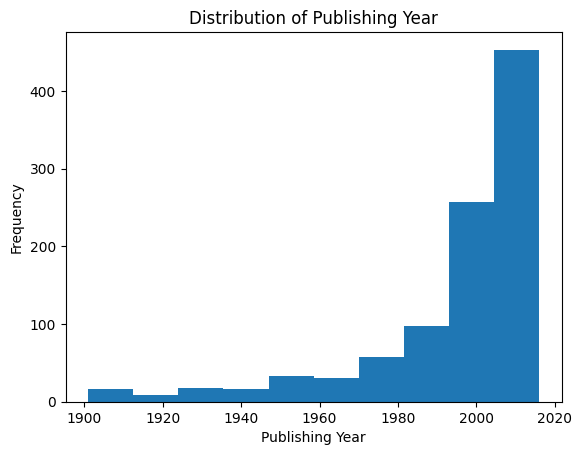

In [15]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

In [ ]:
# This plot shows the number of books published over the years, with a significant increase after the 1900s,
# possibly due to improved publishing methods and rising literacy rates.

In [ ]:
# Plotting bar chart of book genres to examine the distribution of books across various genres

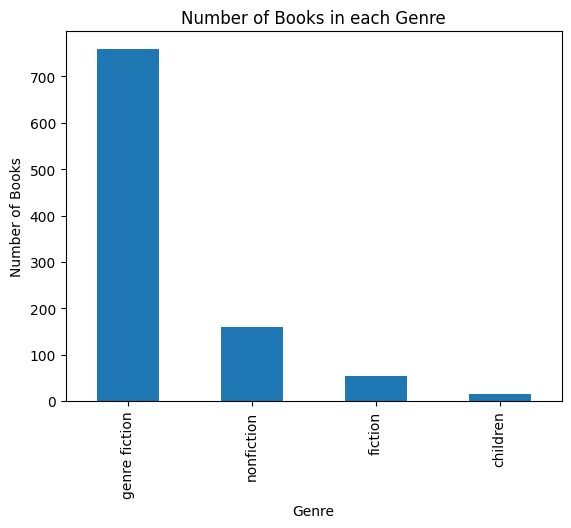

In [16]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("Genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in each Genre")
plt.show()

In [ ]:
# This bar chart reveals the genre with the highest representation in the dataset,
# which can provide insights into popular genres and trends over time.

In [ ]:
# Grouping by 'Author' to calculate the average rating and sorting to find highest-rated authors

In [17]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

In [ ]:
# Creating a boxplot to visualize the distribution of book ratings count across different genres

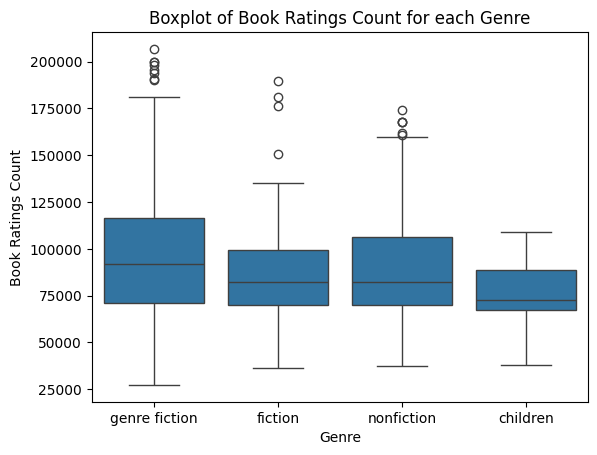

In [18]:
sns.boxplot(x = "genre", y = "Book_ratings_count", data = df)
plt.xlabel("Genre")
plt.ylabel("Book Ratings Count")
plt.title("Boxplot of Book Ratings Count for each Genre")
plt.show()

In [ ]:
# The boxplot shows the spread and central tendency of ratings across genres.
# Genres with a wider spread have a larger variation in popularity, indicated by the ratings count.

In [ ]:
# Scatter plot to analyze the relationship between sale price and units sold

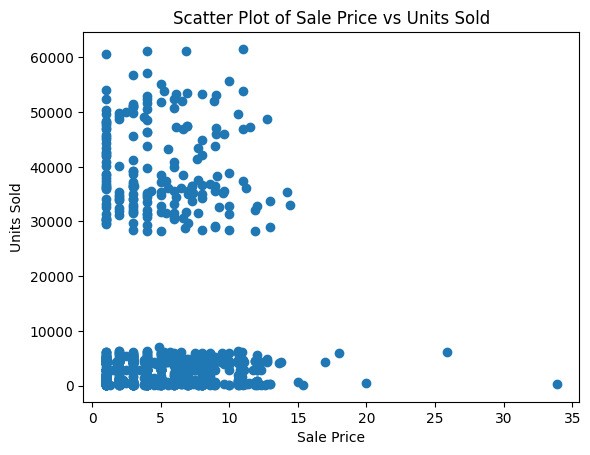

In [19]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price vs Units Sold")
plt.show()

In [ ]:
# This scatter plot suggests whether there is an inverse relationship between price and demand.
# If units sold decrease as price increases, it indicates price sensitivity among consumers.

In [ ]:
# Creating a pie chart to show language distribution of the books in the dataset

In [17]:
language_counts = df["language_code"].value_counts()

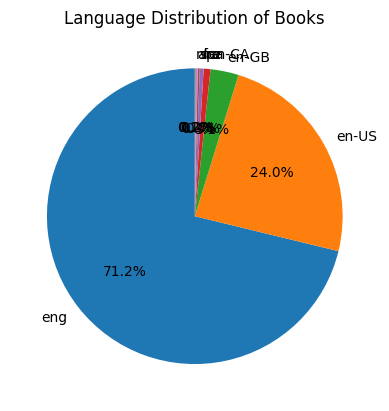

In [18]:
plt.pie(language_counts, labels = language_counts.index, startangle = 90, autopct = "%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()

In [ ]:
# The pie chart illustrates the most common languages in the dataset,
# highlighting the dominance of English and giving an idea of the dataset’s linguistic diversity.

In [22]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [24]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

In [26]:
df.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      670
en-US    226
en-GB     29
en-CA      7
fre        4
ara        2
spa        2
nl         1
dtype: int64

In [27]:
df.groupby("Author_Rating")["Book_ratings_count"].median()

Author_Rating
Excellent       81609.5
Famous          90527.0
Intermediate    98254.5
Novice          77446.5
Name: Book_ratings_count, dtype: float64

In [ ]:
# Scatter plot of book average rating vs. book ratings count to see if highly-rated books also have high popularity

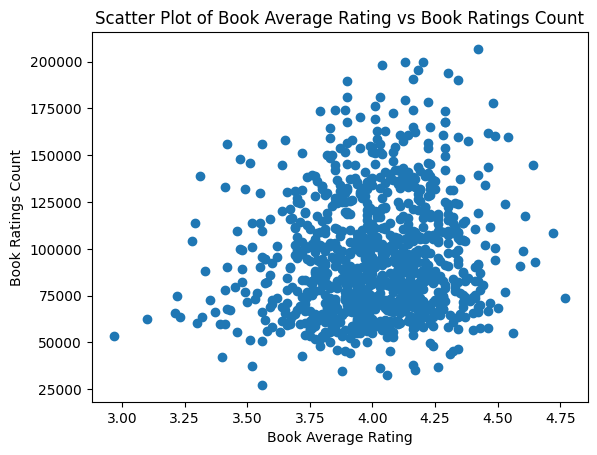

In [29]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter Plot of Book Average Rating vs Book Ratings Count")
plt.show()

In [ ]:
# This scatter plot indicates the relationship between average rating and the number of ratings.
# A positive correlation would suggest that books with higher average ratings tend to have more reader engagement.

In [ ]:
# Calculating and plotting total gross sales by author to identify top-selling authors

In [30]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

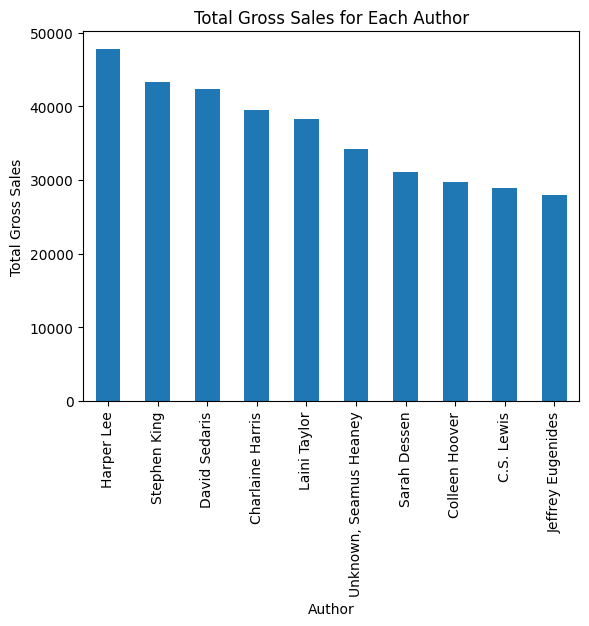

In [40]:
total_gross_sales_by_author.sort_values(ascending = False).head(10).plot(kind = "bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for Each Author")
plt.show()

In [ ]:
# This bar chart highlights the top-grossing authors, providing insight into which authors drive the highest revenue.
# These authors may have strong market appeal or high-value works.

In [ ]:
# Creating a boxplot to visualize the distribution of author ratings vs unit sold

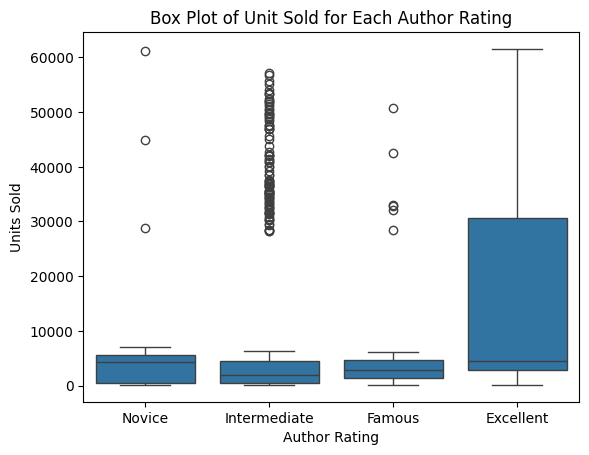

In [39]:
sns.boxplot(x = "Author_Rating", y = "units sold", data = df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Box Plot of Unit Sold for Each Author Rating")
plt.show()

In [ ]:
# Creating a line plot to visualize the trend of total units sold over the years

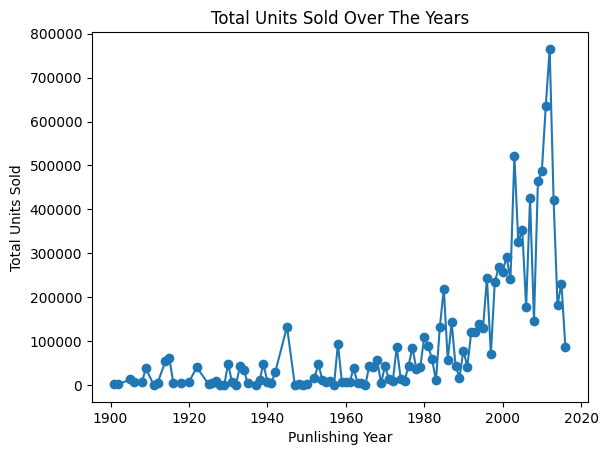

In [42]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind = "line", marker = "o")
plt.xlabel("Punlishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over The Years")
plt.show()

In [ ]:
# The line plot shows how book sales have evolved over the years.
# Peaks and trends could indicate popular publishing periods or notable events affecting book sales.